In [10]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#import your main orders_products_merged dataframe (the one you exported after completing the task in the previous Exercise).
ords_prods_merge = pd.read_pickle (r'C:\Users\49157\Downloads\Instacart Basket Analysis\02 Data\Prepared Data\orders_products_merged_derived_variables.pkl')

In [3]:
# Creating a subset
df = ords_prods_merge[:1000000]

In [4]:
df.shape

(1000000, 21)

In [5]:
df.head()

,Unnamed: 0,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,_merge,product_name,aisle_id,department_id,prices,price_range,price_range_loc,busiest_day,busiest_days,busiest_period_of_day
0,0,2539329,1,prior,1,2,8,NaN,196,1,...,both,Soda,77,7,9.0,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Average orders
1,1,2539329,1,prior,1,2,8,NaN,14084,2,...,both,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Average orders
2,2,2539329,1,prior,1,2,8,NaN,12427,3,...,both,Original Beef Jerky,23,19,4.4,Low-range product,Low-range product,Regularly busy,Regularly busy,Average orders
3,3,2539329,1,prior,1,2,8,NaN,26088,4,...,both,Aged White Cheddar Popcorn,23,19,4.7,Low-range product,Low-range product,Regularly busy,Regularly busy,Average orders
4,4,2539329,1,prior,1,2,8,NaN,26405,5,...,both,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,Low-range product,Low-range product,Regularly busy,Regularly busy,Average orders


In [6]:
# Grouping Data with pandas
df.groupby('product_name')

In [7]:
# calculate the mean of the “order_number” column grouped by the “department_id” column
df.groupby('department_id').agg({'order_number': ['mean']})

,order_number
,mean
department_id,
1,14.800024
2,17.091743
3,17.913544
4,17.893092
5,15.214270
6,15.382135
7,17.694027
8,16.458105


In [8]:
# ggregations that can be conducted without use of the agg() function.
df.groupby('department_id')['order_number'].mean()

department_id
1     14.800024
2     17.091743
3     17.913544
4     17.893092
5     15.214270
6     15.382135
7     17.694027
8     16.458105
9     15.957363
10    20.091818
11    16.482026
12    15.615061
13    16.484023
14    17.524632
15    15.691875
16    18.014071
17    16.150593
18    19.602850
19    17.631340
20    17.138607
21    21.956893
Name: order_number, dtype: float64

In [9]:
# Performing Multiple Aggregations (minimum and maximum)
df.groupby('department_id').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                      mean min max
department_id                     
1                14.800024   1  99
2                17.091743   1  98
3                17.913544   1  99
4                17.893092   1  99
5                15.214270   1  99
6                15.382135   1  99
7                17.694027   1  99
8                16.458105   1  91
9                15.957363   1  99
10               20.091818   1  99
11               16.482026   1  99
12               15.615061   1  99
13               16.484023   1  99
14               17.524632   1  99
15               15.691875   1  99
16               18.014071   1  99
17               16.150593   1  99
18               19.602850   1  99
19               17.631340   1  99
20               17.138607   1  99
21               21.956893   1  97

In [4]:
# Aggregating Data with transform(), creating a loyalty flag column in your ords_prods_merge dataframe and  following the three steps which are included 
# in a single line of codedd
ords_prods_merge['max_order'] = ords_prods_merge.groupby(['user_id'])['order_number'].transform(np.max)

C:\Users\49157\AppData\Local\Temp\ipykernel_25072\117727734.py:3: FutureWarning: The provided callable <function max at 0x0000016D920F5440> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  ords_prods_merge['max_order'] = ords_prods_merge.groupby(['user_id'])['order_number'].transform(np.max)


In [11]:
ords_prods_merge.head()

,Unnamed: 0,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,product_name,aisle_id,department_id,prices,price_range,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order
0,0,2539329,1,prior,1,2,8,NaN,196,1,...,Soda,77,7,9.0,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Average orders,10
1,1,2539329,1,prior,1,2,8,NaN,14084,2,...,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Average orders,10
2,2,2539329,1,prior,1,2,8,NaN,12427,3,...,Original Beef Jerky,23,19,4.4,Low-range product,Low-range product,Regularly busy,Regularly busy,Average orders,10
3,3,2539329,1,prior,1,2,8,NaN,26088,4,...,Aged White Cheddar Popcorn,23,19,4.7,Low-range product,Low-range product,Regularly busy,Regularly busy,Average orders,10
4,4,2539329,1,prior,1,2,8,NaN,26405,5,...,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,Low-range product,Low-range product,Regularly busy,Regularly busy,Average orders,10


In [12]:
ords_prods_merge.head(100)

,Unnamed: 0,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,product_name,aisle_id,department_id,prices,price_range,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order
0,0,2539329,1,prior,1,2,8,NaN,196,1,...,Soda,77,7,9.0,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Average orders,10
1,1,2539329,1,prior,1,2,8,NaN,14084,2,...,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Average orders,10
2,2,2539329,1,prior,1,2,8,NaN,12427,3,...,Original Beef Jerky,23,19,4.4,Low-range product,Low-range product,Regularly busy,Regularly busy,Average orders,10
3,3,2539329,1,prior,1,2,8,NaN,26088,4,...,Aged White Cheddar Popcorn,23,19,4.7,Low-range product,Low-range product,Regularly busy,Regularly busy,Average orders,10
4,4,2539329,1,prior,1,2,8,NaN,26405,5,...,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,Low-range product,Low-range product,Regularly busy,Regularly busy,Average orders,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,738281,2,prior,4,2,10,8.0,21150,13,...,Fire Grilled Steak Bowl,38,1,5.9,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Most orders,14
96,96,1673511,2,prior,5,3,11,8.0,47144,1,...,Unsweetened Original Almond Breeze Almond Milk,91,16,14.0,Mid-range product,Mid-range product,Regularly busy,Slowest days,Most orders,14
97,97,1673511,2,prior,5,3,11,8.0,5322,2,...,Gluten Free Dark Chocolate Chunk Chewy with a ...,3,19,2.9,Low-range product,Low-range product,Regularly busy,Slowest days,Most orders,14
98,98,1673511,2,prior,5,3,11,8.0,17224,3,...,Oats & Honey Gluten Free Granola,3,19,1.6,Low-range product,Low-range product,Regularly busy,Slowest days,Most orders,14


In [ ]:
#This command tells pandas not to assign any options regarding the maximum number of rows to display.
pd.options.display.max_rows = None

In [14]:
ords_prods_merge.head(100)

,Unnamed: 0,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,product_name,aisle_id,department_id,prices,price_range,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order
0,0,2539329,1,prior,1,2,8,NaN,196,1,...,Soda,77,7,9.0,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Average orders,10
1,1,2539329,1,prior,1,2,8,NaN,14084,2,...,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Average orders,10
2,2,2539329,1,prior,1,2,8,NaN,12427,3,...,Original Beef Jerky,23,19,4.4,Low-range product,Low-range product,Regularly busy,Regularly busy,Average orders,10
3,3,2539329,1,prior,1,2,8,NaN,26088,4,...,Aged White Cheddar Popcorn,23,19,4.7,Low-range product,Low-range product,Regularly busy,Regularly busy,Average orders,10
4,4,2539329,1,prior,1,2,8,NaN,26405,5,...,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,Low-range product,Low-range product,Regularly busy,Regularly busy,Average orders,10
5,5,2398795,1,prior,2,3,7,15.0,196,1,...,Soda,77,7,9.0,Mid-range product,Mid-range product,Regularly busy,Slowest days,Fewest orders,10
6,6,2398795,1,prior,2,3,7,15.0,10258,2,...,Pistachios,117,19,3.0,Low-range product,Low-range product,Regularly busy,Slowest days,Fewest orders,10
7,7,2398795,1,prior,2,3,7,15.0,12427,3,...,Original Beef Jerky,23,19,4.4,Low-range product,Low-range product,Regularly busy,Slowest days,Fewest orders,10
8,8,2398795,1,prior,2,3,7,15.0,13176,4,...,Bag of Organic Bananas,24,4,10.3,Mid-range product,Mid-range product,Regularly busy,Slowest days,Fewest orders,10
9,9,2398795,1,prior,2,3,7,15.0,26088,5,...,Aged White Cheddar Popcorn,23,19,4.7,Low-range product,Low-range product,Regularly busy,Slowest days,Fewest orders,10


In [ ]:
# Deriving Columns with loc()

In [5]:
ords_prods_merge.loc[ords_prods_merge['max_order'] > 40, 'loyalty_flag'] = 'Loyal customer'

In [6]:
ords_prods_merge.loc[(ords_prods_merge['max_order'] <= 40) & (ords_prods_merge['max_order'] > 10), 'loyalty_flag'] = 'Regular customer'

In [7]:
ords_prods_merge.loc[ords_prods_merge['max_order'] <= 10, 'loyalty_flag'] = 'New customer'

In [8]:
ords_prods_merge['loyalty_flag']. value_counts(dropna = False)

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64

In [12]:
path = r'C:\Users\49157\Downloads\Instacart Basket Analysis'
path

'C:\\Users\\49157\\Downloads\\Instacart Basket Analysis'

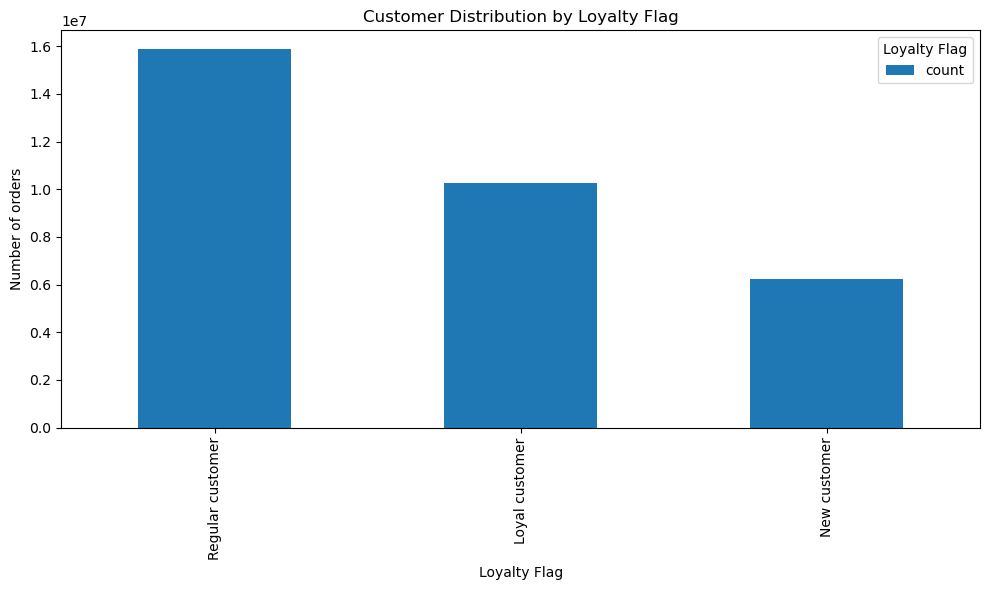

In [14]:
# Sample data
data = {
    'loyalty_flag': ['Regular customer', 'Loyal customer', 'New customer'],
    'count': [15876776, 10284093, 6243990]
}

# Create DataFrame
df = pd.DataFrame(data)
df.set_index('loyalty_flag', inplace=True)

# Define paths
base_path = os.path.expanduser('~/Downloads/Visualizations')
os.makedirs(base_path, exist_ok=True)
image_path = os.path.join(base_path, 'loyalty_flag_distribution.png')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting bar
df.plot(kind='bar', stacked=True, ax=ax)

# Customize labels and title
ax.set_xlabel('Loyalty Flag')
ax.set_ylabel('Number of orders')
ax.set_title('Customer Distribution by Loyalty Flag')
ax.legend(title='Loyalty Flag')

# Save the plot to an image file
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Customer Distribution by Loyalty Flag.png'), bbox_inches = 'tight')
plt.show()

In [19]:
# Accessing multiple columns at the same time
ords_prods_merge[['user_id', 'loyalty_flag', 'order_number']].head(60)

,user_id,loyalty_flag,order_number
0,1,New customer,1
1,1,New customer,1
2,1,New customer,1
3,1,New customer,1
4,1,New customer,1
5,1,New customer,2
6,1,New customer,2
7,1,New customer,2
8,1,New customer,2
9,1,New customer,2
